In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from ipywidgets import interact, interactive, fixed, interact_manual

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    ax1 = sns.distplot(RedFunction, hist=False, color='r', label=RedName)
    sns.distplot(BlueFunction, hist=False, color='b', label=BlueName, ax=ax1)
    plt.title(Title)
    plt.show()
    plt.close()

In [ ]:
df = pd.read_csv('/content/cars-clean.csv')

# only numeric features
df = df._get_numeric_data()
df.head()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3.0,122.0,88.6,-0.438315,-0.851335,-2.029015,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,0,1,1,0
1,1,3.0,122.0,88.6,-0.438315,-0.851335,-2.029015,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,0,1,1,0
2,2,1.0,122.0,94.5,-0.243544,-0.185134,-0.558319,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,0,1,1,0
3,3,2.0,164.0,99.8,0.194690,0.147966,0.217881,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,0,1,1,0
4,4,2.0,164.0,99.4,0.194690,0.243137,0.217881,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,0,1,1,0


In [ ]:
y_data = df['price']
x_data = df.drop('price', axis=1)

# separate data
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.25, random_state=123
)

print('Shape Train:', x_train.shape[0], 'Shape Test:', x_test.shape[0])


Shape Train: 150 Shape Test: 51


with test: 0.4632103709298415
with train: 0.6714816716749207


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


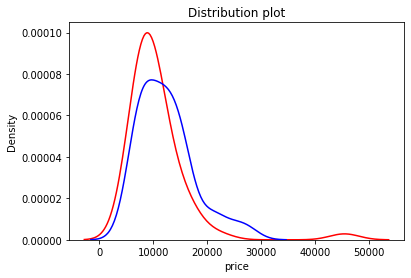

In [ ]:

# model
lr = LinearRegression()
lr.fit(x_train[['horsepower']], y_train)
print('with test:', lr.score(x_test[['horsepower']], y_test))
print('with train:', lr.score(x_train[['horsepower']], y_train))
yhat_lr = lr.predict(x_test[['horsepower']])

DistributionPlot(
    RedFunction=y_test,
    BlueFunction=yhat_lr,
    RedName='Actual Value',
    BlueName='Predict Value',
    Title='Distribution plot',
)


In [ ]:
# cross validation
rcross = cross_val_score(
    lr, x_data[['horsepower']], y_data, cv=4
)  # how to choose num of folds
print(rcross.mean())
print(rcross)

# negative squared error
print(-1 * cross_val_score(lr, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error'))

# accuracy (error)
# print(cross_val_score(lr, x_data[['horsepower']], y_data, cv=4, scoring='accuracy'))



0.5221732664777984
[0.7747254  0.51722436 0.74881624 0.04792707]
[20244958.23821451 43740285.03051738 12491753.70789968 17570582.82435501]


[14143.6442164  14143.6442164  20817.63619486 12746.7621744
 14764.48067952]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


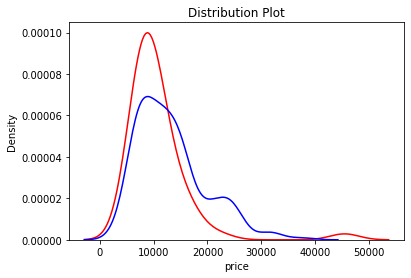

In [ ]:
# predict
yhat_cross = cross_val_predict(lr, x_data[['horsepower']], y_data, cv=4)
print(yhat_cross[:5])

DistributionPlot(
    y_test, yhat_cross, 'Actual Value', 'Predict Value', 'Distribution Plot'
)


0.6582654732978008


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


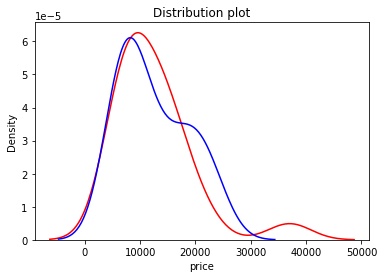

In [ ]:
# mais dados
lr_over = LinearRegression()
lr_over.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
print(lr_over.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test))

yhat_over = lr_over.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

DistributionPlot(y_test, yhat_over, 'Actual Value', 'Predict Value', 'Distribution plot')

In [ ]:
# polynomial
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=0)

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yhat_poly = poly.predict(x_test_pr)
poly.score(x_test_pr, y_test)

0.7980169797331421

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


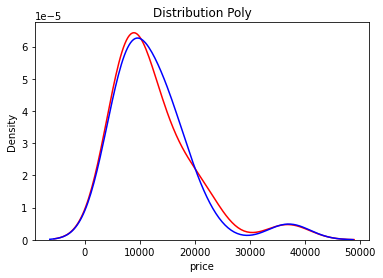

In [ ]:
DistributionPlot(yhat_poly, y_test, 'Predict Value', 'Actual Value', 'Distribution Poly')

Text(3, 0.75, 'Maximum R^2 ')

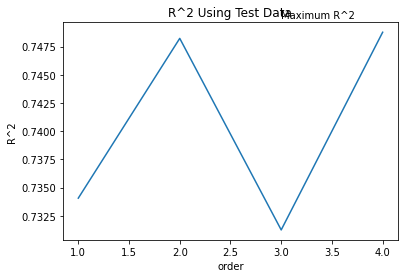

In [ ]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [ ]:
# function and interaction
def f(order, test_data):
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
  pr = PolynomialFeatures(degree=order)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])
  poly = LinearRegression()
  poly.fit(x_train_pr, y_train)
  yhat_pr = poly.predict(x_test_pr)
  DistributionPlot(y_test, yhat_pr, 'Actual Value', 'Predict Value', 'Distribution plot')
  print('Score R^2: ', poly.score(x_test_pr, y_test))  

In [ ]:
interact(f, order=(0,6,1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f>

In [ ]:
# ridge and grid search
ridge = Ridge()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 10000000]}
grids = GridSearchCV(ridge, parameters, cv=5)

grids.fit(x_train[['horsepower']], y_train)
best_est = grids.best_estimator_
best_est

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
best_est.score(x_test[['horsepower']], y_test)

0.7409223459849095

In [ ]:
def f_1()